# Image Classifier

In [2]:
! pip install numpy matplotlib tensorflow opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
     -------------------------------------- 272.8/272.8 MB 7.9 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached protobuf-4.23.3-cp310-abi3-win_amd64.whl (422 kB)
     ---------------------------------------- 1.5/1.5 MB 31.4 MB/s eta 0:00:00
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
     ---------------------------------------- 4.2/4.2 MB 27.1 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached jax-0.4.13.tar.gz (1.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [2]:
# getting datasets
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

# normalization of values
training_images, testing_images = training_images / 255, testing_images / 255

# labels
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [3]:
# training the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

model.save('image_classifier.model')

Epoch 1/10
1563/1563 [==============================] - 43s 26ms/step - loss: 1.5251 - accuracy: 0.4416 - val_loss: 1.2757 - val_accuracy: 0.5369
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1472 - accuracy: 0.5933 - val_loss: 1.0669 - val_accuracy: 0.6231
Epoch 3/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.9996 - accuracy: 0.6479 - val_loss: 0.9929 - val_accuracy: 0.6469
Epoch 4/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9026 - accuracy: 0.6851 - val_loss: 0.9133 - val_accuracy: 0.6777
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8351 - accuracy: 0.7076 - val_loss: 0.9470 - val_accuracy: 0.6761
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7798 - accuracy: 0.7261 - val_loss: 0.9025 - val_accuracy: 0.6890
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7305 - accuracy: 0.7443 - val_loss: 0.8900 -

INFO:tensorflow:Assets written to: cat_classifier.model\assets


INFO:tensorflow:Assets written to: cat_classifier.model\assets


1/1 [==============================] - 0s 93ms/step
3
prediction is Cat


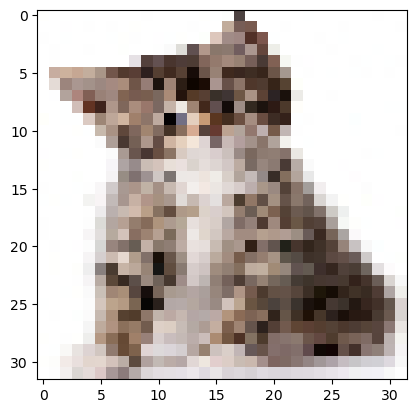

In [5]:
model = models.load_model('image_classifier.model')

img = cv.imread('images/kitten.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(index)
print(f"prediction is {class_names[index]}")